In [1]:
#pip install torch

In [2]:
import torch as th
import numpy as np
import random

#сделаем инициализацию random seed,
#чтобы наши эксперименты были воспроизводимы

random.seed(0)
np.random.seed(0)
th.manual_seed(0)
th.cuda.manual_seed(0)
th.backends.cudnn.deterministic=True

In [3]:
#скачивание датасета для классификации изображений
import torchvision.datasets

MNIST_train = torchvision.datasets.MNIST('./', download = True, train = True)
MNIST_test = torchvision.datasets.MNIST('./', download = True, train = False)

In [4]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/Users/vladamalkina/opt/anaconda3/lib/python3.9/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/Users/vladamalkina/opt/anaconda3/lib/python3.9/site-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/Users/vladamalkina/opt/anaconda3/lib/python3.9/site-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/Users/vladamalkina/opt/anaconda3/lib/python3.9/site-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [5]:
#посмотрим какой у данных тип
X_train.dtype, y_train.dtype

(torch.uint8, torch.int64)

In [6]:
#данные имеют тип беззнаковый 8, а таргеты - целые 64 бита
#преобразуем сразу данные в веществиенный тип
X_train = X_train.float()
X_test = X_test.float()

In [7]:
#посмотрим на расзмерность датасетов
X_train.shape, X_test.shape
#это очень маленькие картинки, именно поэтому мы можем использовать
#полносвязную нейронную сеть для такой задачи, а не сверточные сети

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

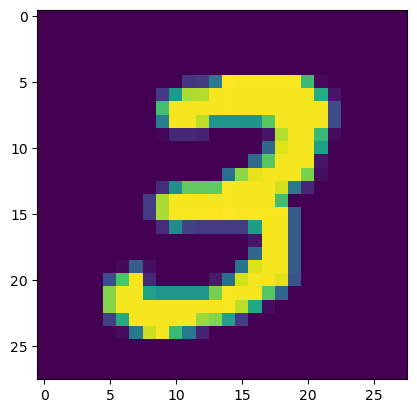

tensor(3)


In [8]:
#посмотрим на картинки
import matplotlib.pyplot as plt
plt.imshow(X_train[7, :, :])
plt.show()
print(y_train[7])

In [9]:
#у нас трезмерный тензор, мы хотим двумерный тензор,
#чтобы первая рамерность сохранилась, то есть 60000 картинок
#вместо 28 и 28 будет 764 пикселя

X_train = X_train.reshape([-1, 28*28])
X_test = X_test.reshape([-1, 28*28])

print(X_train)


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [10]:
#Создание сети
# на выходе у нас числа от 0 до 9
class MNISTnet(th.nn.Module):
    def __init__(self, n):
        super (MNISTnet, self).__init__()
        self.fc1 = th.nn.Linear(28*28, n)
        self.act1 = th.nn.Sigmoid()
        self.fc2 = th.nn.Linear(n, n)
        self.act2 = th.nn.Tanh()
        self.out = th.nn.Linear(n, 10)
        self.sm = th.nn.Softmax(dim=1)


    def forward(self, x):
        x = th.flatten(x, 1)
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.out(x)
        return x
        

    def predict(self, x):
        with th.no_grad():
            x = self.forward(x)
            x = self.sm(x)
            return x

In [11]:
#Создание сети
# на выходе у нас числа от 0 до 9
class MNISTnet_(th.nn.Module):
    def __init__(self, n):
        super (MNISTnet_, self).__init__()
        self.fc1 = th.nn.Linear(28*28, n)
        self.act1 = th.nn.Sigmoid()
        self.fc2 = th.nn.Linear(n, n)
        self.act2 = th.nn.Tanh()
        self.fc3 = th.nn.Linear(n, n)
        self.act3 = th.nn.Tanh()
        self.fc4 = th.nn.Linear(n, n)
        self.act4 = th.nn.Tanh()
        self.out = th.nn.Linear(n, 10)
        self.sm = th.nn.Softmax(dim=1)


    def forward(self, x):
        x = th.flatten(x, 1)
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.act3(x)
        x = self.fc4(x)
        x = self.act4(x)
        x = self.out(x)
        return x
        

    def predict(self, x):
        with th.no_grad():
            x = self.forward(x)
            x = self.sm(x)
            return x

In [12]:
net_first_30 = MNISTnet(30)
net_first_70 = MNISTnet(70)
net_second_30 = MNISTnet_(30)
net_second_70 = MNISTnet_(70)

In [16]:
#лосс функция
criterion = th.nn.CrossEntropyLoss()

In [17]:
#оптимизатор
optimizer_net_first_30 = th.optim.Adam(net_first_30.parameters(), lr=0.001)

In [18]:
#оптимизатор
optimizer_net_first_70 = th.optim.Adam(net_first_70.parameters(), lr=0.001)

In [19]:
#оптимизатор
optimizer_net_second_30 = th.optim.Adam(net_second_30.parameters(), lr=0.001)

In [20]:
#оптимизатор
optimizer_net_second_70 = th.optim.Adam(net_second_70.parameters(), lr=0.001)

In [21]:
train_losses = []
test_losses = []

batch_size = 50 # размер батча
epochs = 40 #количество эпох

for epoch in range(epochs):
    order = np.random.permutation(len(X_train))
    for start_index in range (0,len(X_train), batch_size):

        optimizer_net_first_30.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]
        batch_X = X_train[batch_indexes]
        batch_y = y_train[batch_indexes]


        preds = net_first_30.forward(batch_X)
        loss_val = criterion(preds, batch_y)
        loss_val.backward()
        optimizer_net_first_30.step()
    
    preds = net_first_30.predict(X_train)
    loss_val = criterion(preds, y_train)
    train_losses.append(loss_val.item())
        
        
    test_preds = net_first_30.predict(X_test)
    loss = criterion(test_preds, y_test)
    test_losses.append(loss.item())
    
test_preds = net_first_30.forward(X_test)
accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
print(accuracy)

tensor(0.9321)


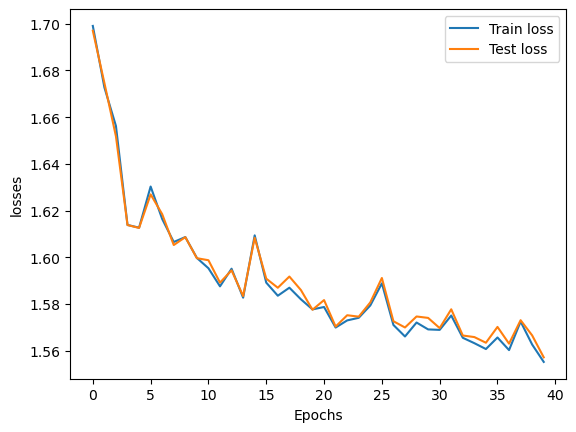

In [22]:
# Построение графика потерь
plt.xlabel('Epochs')
plt.ylabel('losses')
plt.plot(train_losses, label='Train loss')
plt.plot(test_losses, label='Test loss')
plt.legend()
plt.show()

In [23]:
train_losses = []
test_losses = []

batch_size = 50 # размер батча
epochs = 40 #количество эпох

for epoch in range(epochs):
    order = np.random.permutation(len(X_train))
    for start_index in range (0,len(X_train), batch_size):

        optimizer_net_first_70.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]
        batch_X = X_train[batch_indexes]
        batch_y = y_train[batch_indexes]


        preds = net_first_70.forward(batch_X)
        loss_val = criterion(preds, batch_y)
        loss_val.backward()
        optimizer_net_first_70.step()
    
    preds = net_first_70.predict(X_train)
    loss_val = criterion(preds, y_train)
    train_losses.append(loss_val.item())
        
        
    test_preds = net_first_70.predict(X_test)
    loss = criterion(test_preds, y_test)
    test_losses.append(loss.item())
    
    
test_preds = net_first_70.forward(X_test)
accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
print(accuracy)

tensor(0.9513)


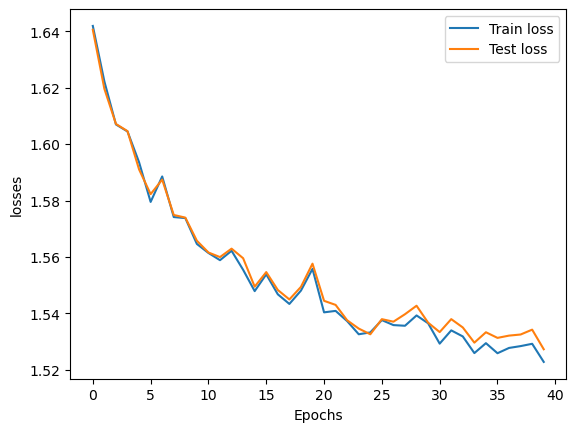

In [24]:
# Построение графика потерь
plt.xlabel('Epochs')
plt.ylabel('losses')
plt.plot(train_losses, label='Train loss')
plt.plot(test_losses, label='Test loss')
plt.legend()
plt.show()

In [25]:
train_losses = []
test_losses = []

batch_size = 50 # размер батча
epochs = 40 #количество эпох

for epoch in range(epochs):
    order = np.random.permutation(len(X_train))
    for start_index in range (0,len(X_train), batch_size):

        optimizer_net_second_30.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]
        batch_X = X_train[batch_indexes]
        batch_y = y_train[batch_indexes]


        preds = net_second_30.forward(batch_X)
        loss_val = criterion(preds, batch_y)
        loss_val.backward()
        optimizer_net_second_30.step()
    
    preds = net_second_30.predict(X_train)
    loss_val = criterion(preds, y_train)
    train_losses.append(loss_val.item())
        
        
    test_preds = net_second_30.predict(X_test)
    loss = criterion(test_preds, y_test)
    test_losses.append(loss.item())
    
    
test_preds = net_second_30.forward(X_test)
accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
print(accuracy)

tensor(0.9286)


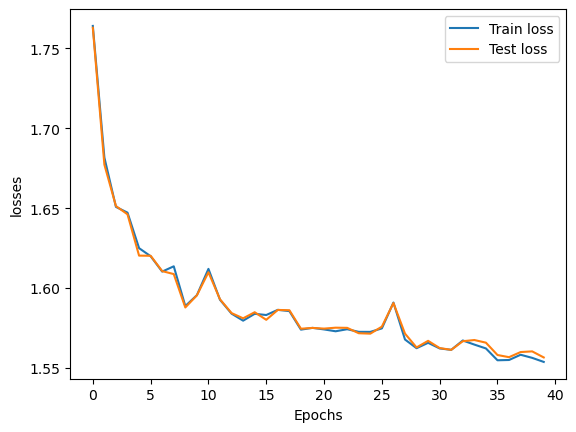

In [26]:
# Построение графика потерь
plt.xlabel('Epochs')
plt.ylabel('losses')
plt.plot(train_losses, label='Train loss')
plt.plot(test_losses, label='Test loss')
plt.legend()
plt.show()

In [27]:
train_losses = []
test_losses = []

batch_size = 50 # размер батча
epochs = 40 #количество эпох

for epoch in range(epochs):
    order = np.random.permutation(len(X_train))
    for start_index in range (0,len(X_train), batch_size):

        optimizer_net_second_70.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]
        batch_X = X_train[batch_indexes]
        batch_y = y_train[batch_indexes]

        preds = net_second_70.forward(batch_X)
        loss_val = criterion(preds, batch_y)
        loss_val.backward()
        optimizer_net_second_70.step()
    
    preds = net_second_70.predict(X_train)
    loss_val = criterion(preds, y_train)
    train_losses.append(loss_val.item())
        
        
    test_preds = net_second_70.predict(X_test)
    loss = criterion(test_preds, y_test)
    test_losses.append(loss.item())
    
    
test_preds = net_second_70.forward(X_test)
accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
print(accuracy)

tensor(0.9356)


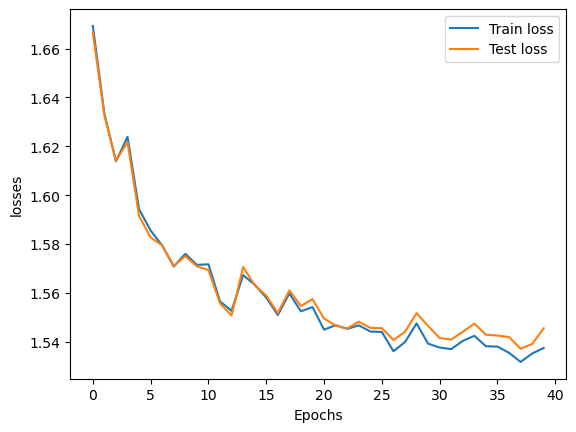

In [28]:
# Построение графика потерь
plt.xlabel('Epochs')
plt.ylabel('losses')
plt.plot(train_losses, label='Train loss')
plt.plot(test_losses, label='Test loss')
plt.legend()
plt.show()

# net_first_70

In [29]:
net_first_70 = MNISTnet(70)
optimizer_net_first_70 = th.optim.Adam(net_first_70.parameters(), lr=0.001)

In [30]:
train_losses = []
test_losses = []

batch_size = 50 # размер батча
epochs = 200 #количество эпох

for epoch in range(epochs):
    order = np.random.permutation(len(X_train))
    for start_index in range (0,len(X_train), batch_size):

        optimizer_net_first_70.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]
        batch_X = X_train[batch_indexes]
        batch_y = y_train[batch_indexes]


        preds = net_first_70.forward(batch_X)
        loss_val = criterion(preds, batch_y)
        loss_val.backward()
        optimizer_net_first_70.step()
    
    preds = net_first_70.predict(X_train)
    loss_val = criterion(preds, y_train)
    train_losses.append(loss_val.item())
        
        
    test_preds = net_first_70.predict(X_test)
    loss = criterion(test_preds, y_test)
    test_losses.append(loss.item())
    
    
test_preds = net_first_70.forward(X_test)
accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
print(accuracy)

tensor(0.9608)


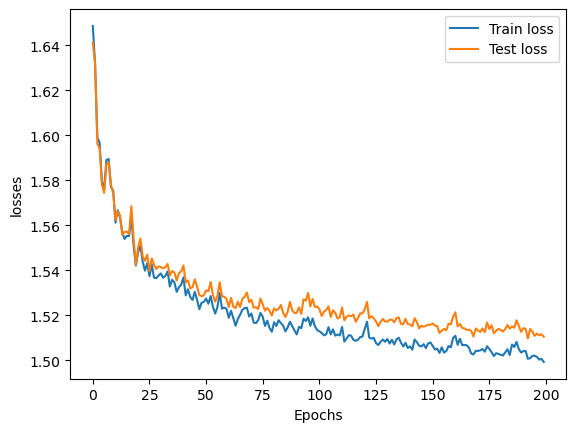

In [31]:
# Построение графика потерь
plt.xlabel('Epochs')
plt.ylabel('losses')
plt.plot(train_losses, label='Train loss')
plt.plot(test_losses, label='Test loss')
plt.legend()
plt.show()